# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Stanley Alexander Gondowardojo
- **Email Bangkit:** m320b4ky4203@bangkit.academy
- **Email Login Dicoding:** s160422029@student.ubaya.ac.id
- **ID Dicoding:** stanley_alexander

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana cuaca dapat mempengaruhi jumlah penyewaan sepeda setiap harinya?
- Pertanyaan 2 : Bagaimana perubahan musim dapat mempengaruhi jumlah penyewaan sepeda setiap harinya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
df = pd.read_csv("day.csv") #Membaca file day.csv

df.head(10) #Menampilkan 10 data teratas dari day.csv

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**
- Dataset yang diguanakan adalah day.csv dimana dataset tersebut berisi 16 variabel sesuai pada tabel di atas.
- Variabel yang relevan digunakan untuk menjawab pertanyaan adalah
  - season
  - cnt
  - temp
  - weathersit
  - windspeed

### Assessing Data

In [ ]:
df.info() #Menampilkan informasi mengenai data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Dataset yang diterima sudah lengkap yaitu 16 variabel
- Semua data nya berjumlah 731 yang menandakan tidak ada value yang kurang atau lebih

### Cleaning Data

In [ ]:
df["season"] = df["season"].map({1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}) #Mengubah data season yang awalnya int menjadi kalimat yang mudah dibaca
df["weathersit"] = df["weathersit"].map({1: "Clear/Partly Cloudy", 2: "Mist/Cloudy", 3: "Light Snow/Rain", 4: "Heavy Rain/Snow"}) #Mengubah data weathersit yang awalnya int menjadi kalimat yang mudah dibaca

df.head(10) #Menampilkan 10 data teratas

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,Spring,0,1,0,4,1,Clear/Partly Cloudy,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,Spring,0,1,0,5,1,Mist/Cloudy,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,Spring,0,1,0,6,0,Mist/Cloudy,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,Spring,0,1,0,0,0,Clear/Partly Cloudy,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,Spring,0,1,0,1,1,Clear/Partly Cloudy,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**
- Kolom season sekarang mudah dibaca karena hasil pada tabel sudah diubah dari int diubah menjadi kalimat deskriptif
- Kolom weathersit sekarang mudah dibaca karena hasil pada tabel sudah diubah dari int diubah menjadi kalimat deskriptif

## Exploratory Data Analysis (EDA)

### Explore ...

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


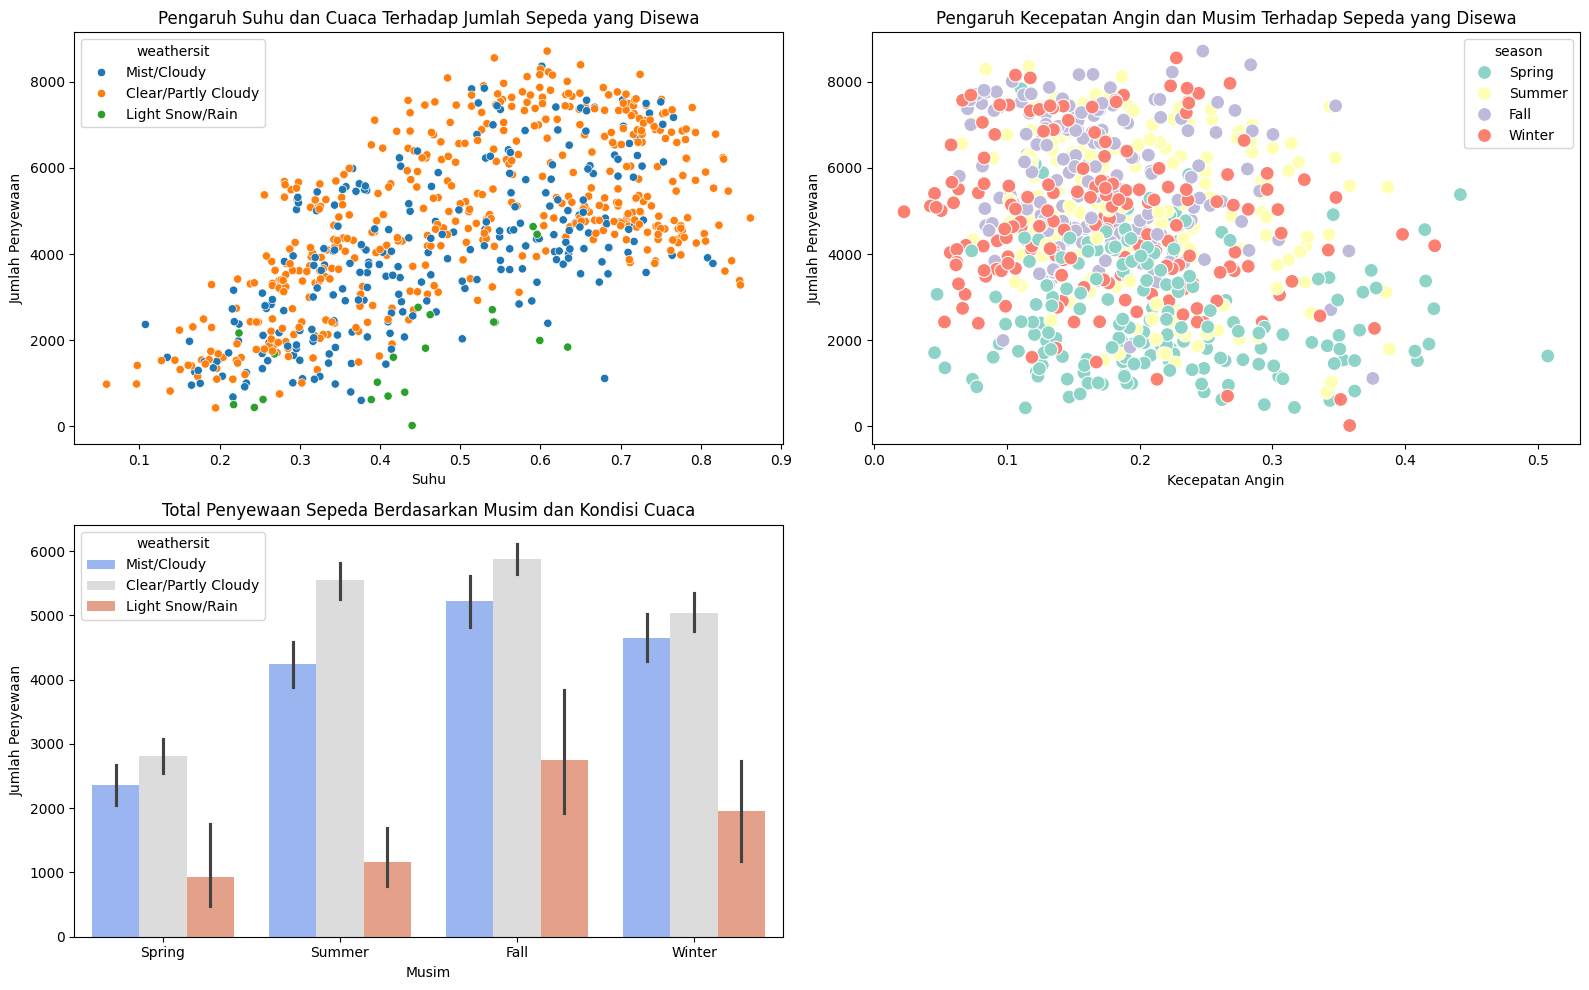

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))  #Mengatur ukuran gambar menjadi 16x10 dan mengatur matriks menjadi 2x2 untuk menampilkan gambar

#Grafik pertama menggunakan scatterplot dengan isi nya adalah pengaruh suhu dan cuaca terhadap jumlah penyewaan sepeda
sns.scatterplot(data=df, x="temp", y="cnt", hue="weathersit", ax=axes[0, 0]) #Membuat grafik scatter plot dengan memasukkan parameter yang relevan seperti x sebagai suhu, y sebagai jumlah penyewaan, hue sebagai cuaca dan memasukkannya ke dalam matriks baris 1 kolom 1
axes[0, 0].set_title("Pengaruh Suhu dan Cuaca Terhadap Jumlah Sepeda yang Disewa") #Judul dari grafik
axes[0, 0].set_xlabel("Suhu") #Nama label di sumbu x
axes[0, 0].set_ylabel("Jumlah Penyewaan") #Nama label di sumbu y

#Grafik kedua menggunakan scatterplot dengan isi nya adalah pengaruh kecepatan angin dan musim terhadap jumlah penyewaan sepeda
sns.scatterplot(data=df, x="windspeed", y="cnt", hue="season", palette="Set3", s=100, ax=axes[0, 1]) #Membuat grafik scatter plot dengan memasukkan parameter yang relevan seperti x sebagai kecepatan angin, y sebagai jumlah penyewaan, hue sebagai musim dan memasukkannya ke dalam matriks baris 1 kolom 2
axes[0, 1].set_title('Pengaruh Kecepatan Angin dan Musim Terhadap Sepeda yang Disewa') #Judul dari grafik
axes[0, 1].set_xlabel('Kecepatan Angin') #Nama label di sumbu x
axes[0, 1].set_ylabel('Jumlah Penyewaan') #Nama label di sumbu y

#Grafik kedua menggunakan barplot dengan isi nya adalah total penyewaan sepeda berdasarkan musim dan kondisi cuaca
sns.barplot(data=df, x='season', y='cnt', hue='weathersit', palette='coolwarm', ax=axes[1, 0]) #Membuat grafik scatter plot dengan memasukkan parameter yang relevan seperti x sebagai musim, y sebagai jumlah penyewaan, hue sebagai cuaca dan memasukkannya ke dalam matriks baris 2 kolom 1
axes[1, 0].set_title('Total Penyewaan Sepeda Berdasarkan Musim dan Kondisi Cuaca') #Judul dari grafik
axes[1, 0].set_xlabel('Musim') #Nama label di sumbu x
axes[1, 0].set_ylabel('Jumlah Penyewaan') #Nama label di sumbu y

fig.delaxes(axes[1, 1]) #Mengkosongkan matriks baris 2 kolom 2 agar tidak terjadi error

# Menampilkan grafik yang sudah dibuat matriks 2x2
plt.tight_layout()
plt.show()

**Insight:**
- Semakin tinggi suhu temperaturnya, maka semakin tinggi juga jumlah penyewaan sepedanya, terutama pada cuaca cerah atau berawan sangat meningkatkan jumlah penyewaan sepeda. Sebaliknya cuaca bersalju atau hujan membuat jumlah penyewaan sepeda menjadi menurun
- Dapat dilihat dari grafik, jumlah penyewaan sepeda tertinggi berada pada kecepatan angin 0.2+-. Namun semakin tingginya angin jumlah penyewaan sepeda semakin menurun. Selain itu jumlah penyewaan terbanyak berada pada musim panas, musim gugur dan musim dingin. Hal ini berarti masyarakat cenderung menaiki sepeda dengan kecepatan angin yang tanang dan hanya pada musim-musim tertentu saja, seperti musim panas, gugur, dan dingin
- Musim gugur dan musim semi mempunyai jumlah penyewaan sepeda tertinggi, terutama pada cuaca cerah atau berawan. Namun pada musim semi, meskipun cuaca cerah atau berawan tidak banyak yang ingin bersepeda. Faktor cuaca hujan dan bersalju pada musim semi juga membuat jumlah penyewaan sepeda menurun drastis. Hal ini menunjukkan bahwa musim dan cuaca menjadi faktor penting untuk masyarakat dalam menggunakan layanan penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

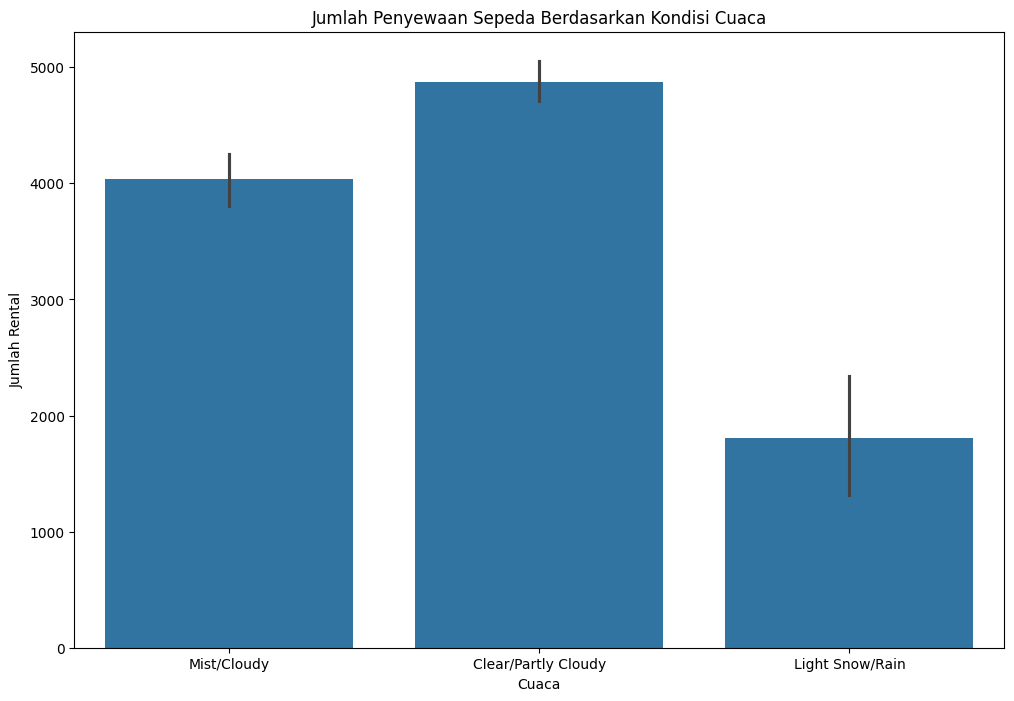

In [ ]:
plt.figure(figsize=(12,8)) #Mengatur ukuran gambar yang akan ditampilkan
sns.barplot(data=df, x="weathersit", y="cnt") #Membuat visualisasi data menggunakan bar plot dengan x sebagai cuaca dan y sebagai jumlah rental sepeda
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca") #Judul visualisasi data
plt.xlabel("Cuaca") #Nama label di sumbu x
plt.ylabel("Jumlah Rental") #Nama label di sumbu y
plt.show() #Menampilkan gambar

### Pertanyaan 2:

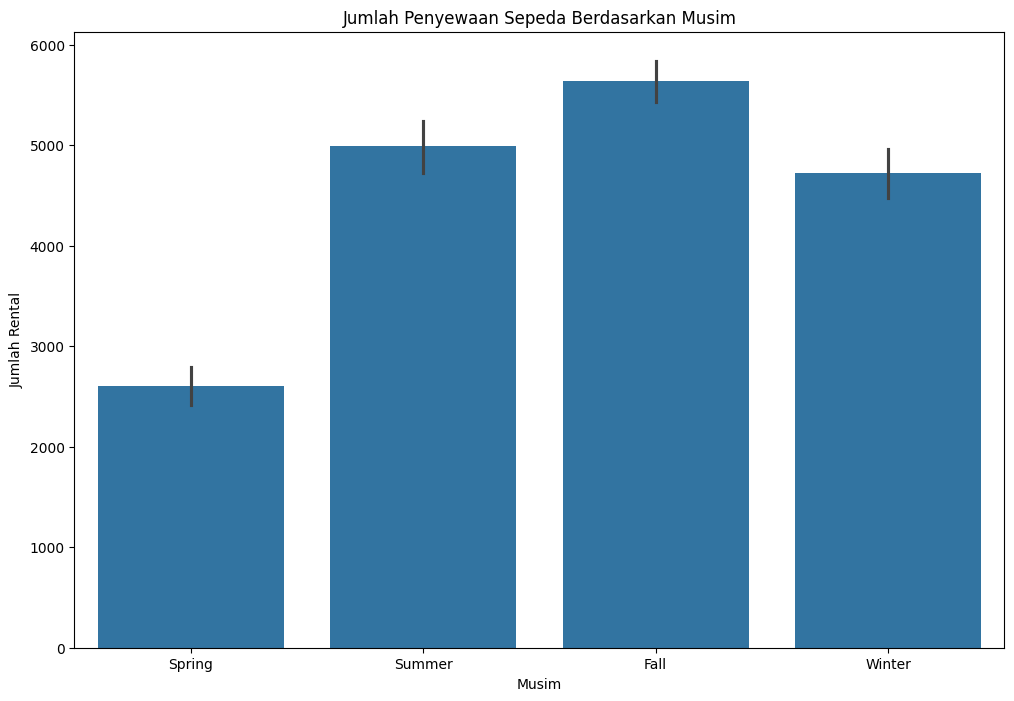

In [ ]:
plt.figure(figsize=(12,8)) #Mengatur ukuran gambar yang akan ditampilkan
sns.barplot(data=df, x="season", y="cnt") #Membuat visualisasi data menggunakan bar plot dengan x sebagai musim dan y sebagai jumlah rental sepeda
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim") #Judul visualisasi data
plt.xlabel("Musim") #Nama label di sumbu x
plt.ylabel("Jumlah Rental") #Nama label di sumbu y
plt.show() #Menampilkan gambar

**Insight:**
- Pada grafik pertanyaan 1, cuaca cerah meningkatkan jumlah penyewaan sepeda setiap harinya, namun pada cuaca hujan atau bersalju jumlah penyewaan sepeda menjadi turun drastis. Hal ini menunjukkan bahwa faktor cuaca memegang peran penting dalam menjalankan layanan penyewaan sepeda
- Pada grafik pertanyaan 2, jumlah penyewaan tertinggi dicapai pada musim kemarau dan penyewaan terendah dicapai oleh musim semi. Hal ini menujukkan bahwa faktor musim memegang peran penting dalam menjalankan layanan penyewaan sepeda

## Conclusion

- Conclution pertanyaan 1 : cuaca yang cerah ataupun berawan dapat meningkatkan hasil penyewaan sepeda, sedangkan cuaca yang buruk, seperti hujan atau bersalju dapat menurunkan hasil penyewaan sepeda
Hal ini menunjukkan bahwa masyarakat cenderung bersepeda pada cuaca yang ceriah dan nyaman, seperti cuaca cerah atau berawan. Faktor cuaca sangat berpengaruh kepada masyarakat untuk melakukan aktivitas bersepda di luar runagan. Untuk meningkatkan jumlah penyewaan sepeda, pihak penyewa dapat melakukan promosi pada hari cerah atau berawan. Selain itu pada cuaca yang buruk, seperti hujan atau bersalju, pihak penyewa dapat membuat fasilitas, seperti shellter sebagai tempat yang nyaman saat ada yang ingin menyewa sepeda meskipun cuaca di luar sedang buruk.

- Conclution pertanyaan 2 : banyak masyarakat yang menyewa sepeda pada musim gugur, namun pada musim semi tidak banyak yang ingin menyewa sepeda dibandingkan pada musim lainnya. Hal ini menunjukkan bahwa musim dan suhu menjadi faktor penting dalam masyarakat melakukan aktivitas bersepeda. Pada musim gugur dimana jumlah penyewaan sepeda sedang tinggi, pihak penyewa bisa melakukan promosi atau mengadakan event agar jumlah penyewaan sepeda bisa menjadi lebih tinggi. Sedangkan pada musim semi, pihak penyewa bisa melakukan diskon untuk mengikat daya tarik pembeli agar ingin menyewa sepeda.  